In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1.Importing and Preprocessing the data for MNIST

2024-03-20 18:08:47.984688: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-20 18:08:47.984877: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-20 18:08:48.126013: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
47040000
(60000, 28, 28)
Train Images Size: (60000, 28, 28)


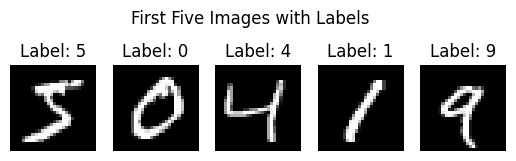

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5665 - loss: 1.2698 - val_accuracy: 0.9232 - val_loss: 0.2695
Epoch 2/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8706 - loss: 0.4384 - val_accuracy: 0.9375 - val_loss: 0.2112
Epoch 3/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9035 - loss: 0.3433 - val_accuracy: 0.9453 - val_loss: 0.1841
Epoch 4/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9140 - loss: 0.3061 - val_accuracy: 0.9508 - val_loss: 0.1665
Epoch 5/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9214 - loss: 0.2786 - val_accuracy: 0.9552 - val_loss: 0.1534
Epoch 6/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9287 - loss: 0.2491 - val_accuracy: 0.9582 - val_loss: 0.1446
Epoch 7/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9335 - loss: 0.2347 - val_accuracy: 0.9597 - val_loss: 0.1376
Epoch 8/100
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9411 - loss: 0.2130 - val_accu

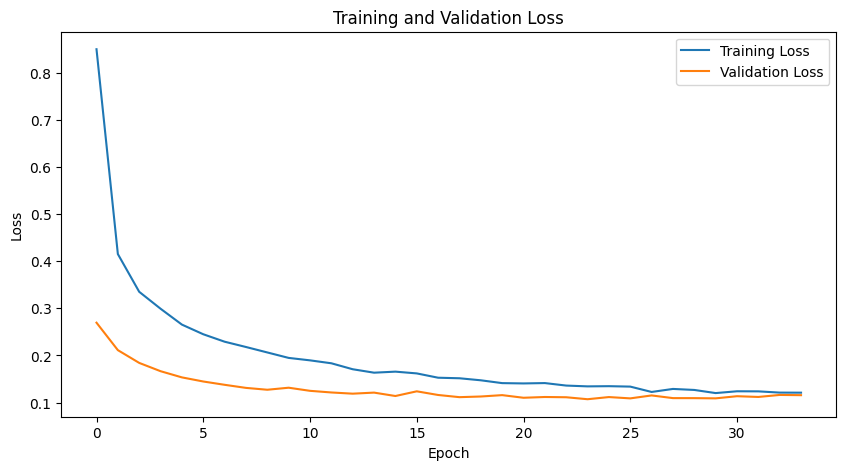

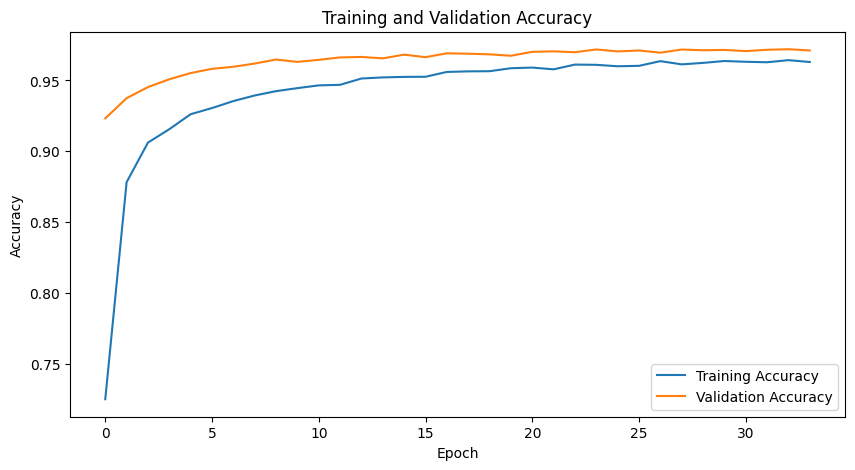

Test Loss: 0.10147251933813095
Test Accuracy: 0.9732999801635742
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


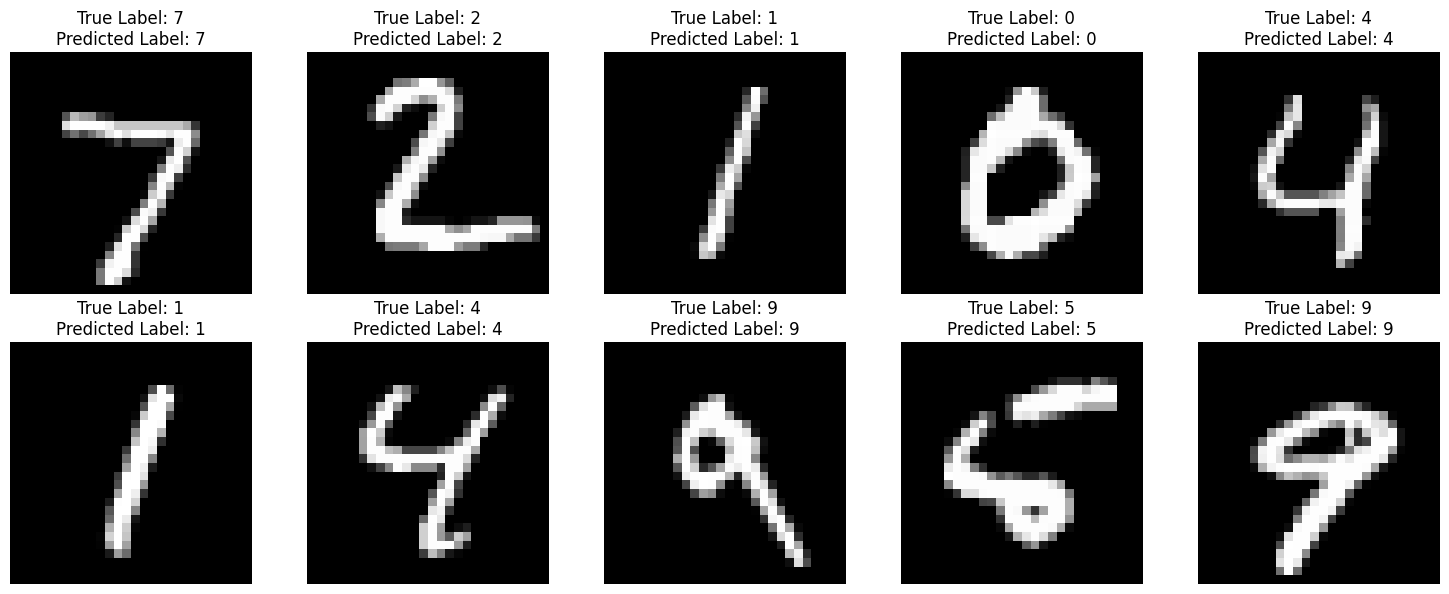

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
# Loading MNIST from keras datasets. Spliting Dataset to train and test.Split ratio - 6:1
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.mnist.load_data()
print(train_images.size)
train_images,test_images=train_images/255.0,test_images/255.0
print(train_images.shape)

### Model Building Sequentially

# Loading MNIST from keras datasets. Splitting Dataset to train and test. Split ratio - 6:1
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Display the size of the train_images array
print("Train Images Size:", train_images.shape)

# Normalize the pixel values to [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Display the first few train images and their corresponding labels
num_images_to_display = 5
# plt.figure(figsize=(1,5))
for i in range(num_images_to_display):
    plt.subplot(1,num_images_to_display,i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
    plt.grid(False)
plt.suptitle('First Five Images with Labels',y=0.7)
plt.show()


### Model Building : Layer by Layer

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout for regularization
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout for regularization
    tf.keras.layers.Dense(10, activation='softmax')  # Use softmax activation for output layer
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(train_images, train_labels,
                    epochs=100,  # Set a maximum number of epochs
                    batch_size=128,
                    validation_split=0.3,
                    callbacks=[early_stopping],
                    verbose=1)

# Access training metrics from the history object
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']



# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Get model predictions for the test images
predictions = model.predict(test_images)

# Plot the first few images along with their predicted labels
num_images_to_display = 10
plt.figure(figsize=(15, 6))
for i in range(num_images_to_display):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"True Label: {test_labels[i]}\nPredicted Label: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()
